# Complexity Project

Aim of complexity is to understand a subclass non-equilibrium systems

Models studies include:
1. Oslo Model

In [22]:
import numpy as np
import random
import matplotlib.pyplot as plt

### 1. Oslo Model
Grains are added to the left most pile, when the system has entered a staircase recurrent configuration, the grain the take L steps, before leaving the system. 

A recurrent configuration means that the system has reached a steady state, as it only occurs after all transient configurations have occured. This applied to BTW model, i believe this also applied to oslo.





In [3]:
def plot_bar(z,title = "Oslo Model"):
    heights = np.cumsum(z[::-1])[::-1] #indexing to reverse list
    plt.figure(figsize= (8,5))
    plt.bar(np.arange(1,len(z)+1,1),heights)
    plt.title(title)
    plt.ylabel("Heights")
    plt.xlabel("sites")

In [189]:
def Oslo(L, plot=False, p=1 / 2, N_recurrents=1000, title=None):
    """
    Parameters
    L: Number of sites 
    plot: Plots heights if true
    p: probability
    N_recurrents: Number of recurrent runs after reaching steady state
    """
    # Allows for change in probabilities
    n = int(1 / p)  # Number of thresholds, from probability
#     prob = [p] * n
    z_ths = np.arange(1, n + 1, 1)  # Generates possible thresholds [1,2,...]
    #     print(z_ths)

    # Initialisation
    z = [0] * L
    z_th = [random.choice(z_ths) for x in range(L)]

    # Variables for testing
    avalanches = []
    end_value = 0
    z_avg_steady = []
    steady = False  # To
    N_full_avalanche = 0  # Tracks full avalanches
    configurations = []  # Find number of unique configurations
    outflux = 0

    while end_value < N_recurrents:

        # Drive
        z[0] += 1

        # Relaxation - Checks all slopes z relaxed, before driving again
        while any(x > y for x, y in zip(z, z_th)) == True:  # z[i] > z_th[i]:
            s = 0
            for i in range(len(z)):
                if z[i] > z_th[i]:
                    s += 1
                    if i == 0:
                        z[0] = z[0] - 2
                        z[1] = z[1] + 1

                    elif i == len(z) - 1:  # index 0,...,L-1 ; len to L
                        z[-1] = z[-1] - 1
                        z[-2] = z[-2] + 1
                        if steady == True: outflux += 1
                    else:
                        z[i] = z[i] - 2
                        z[i + 1] = z[i + 1] + 1
                        z[i - 1] = z[i - 1] + 1

                    # Only resets if topples
                    z_th[i] = random.choice(z_ths)

                # If avalance size is whole length of sites
                if s == L:
                    steady = True
                    N_full_avalanche += 1

                if steady == True:
                    end_value += 1
                    z_avg_steady.append(np.cumsum(z[::-1])[::-1][0])
                avalanches.append(s)

        configurations.append(z[:])
        # Check 
        if any(x > max(z_ths) for x in z) == True:
            raise ValueError("Not all sites relaxed")

    # Obtains cumulative sum of slopes, to represent heights
    heights = np.cumsum(z[::-1])[::-1]  # indexing to reverse list

    if plot == True:
        plot_bar(z)

    #     print(outflux)
    return heights, z, np.mean(z_avg_steady), configurations


a,b,c,d = Oslo(50, p=1 / 2, plot=False, N_recurrents=10)
print("done")

done


#TODO
1. Figure out how to stop the iterations
    I don't think you can us avalanche size because it is random in this
2. Devise own tests, to test on different values of p (e.g. p = 1), Ns Nr

### 1.1. Test 1,2: Expected Heights at site i =1
For p = 1/2, we expect the mean height for the first site to be around
* 26.5 for L = 16, and 
* 53.9 for L = 32

In [172]:
# Test 1, height_1 (L==16) = 26.5
avg_h1 = Oslo(16)[2]

print("Expected = {}, Model = {:.2f}, {:.2f}%".format(26.5,avg_h1,(avg_h1 - 26.5)/26.5 * 100))

# Test 2, height_1 (L==32) = 53.9
avg_h1 = Oslo(32)[2]
print("Expected = {}, Model = {:.2f}, {:.2f}%".format(53.9,avg_h1,(avg_h1 - 53.9)/53.9 * 100))

Expected = 26.5, Model = 26.43, -0.28%
Expected = 53.9, Model = 55.35, 2.69%


### 1.2 Test 3: Reduction to BTW Model (d=1)
For p=1, this should reduce back to the BTW model for d=1, where grains are only added at i=1. BTW does not account for possible spatial and temporal fluctuations, thus the steady state of the system should occur after a grain takes avalanche steps equal to the number of sites. 

This was shown from the test below

Expected = 16, Model = 16.00


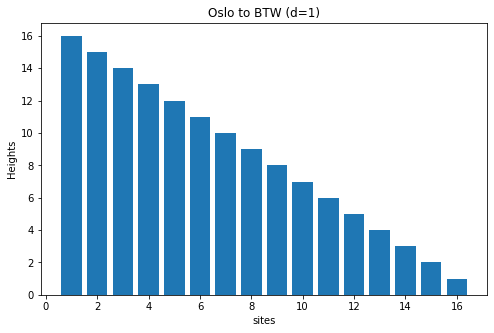

In [171]:
# Test 3, p = 1, z_th = [1], Recurrent state should be L = 16
a,b, mean_height,d = Oslo(16,p = 1/1,plot= True,N_recurrents = 10,title = "Oslo to BTW (d=1)")

print("Expected = {}, Model = {:.2f}".format(16,mean_height))

In [2]:
# Test: N_s, N_r
# Test if p = 1/2, other Ls?
# Test for another p (p = 1/3?)
# average avalanche size / height (pg 279) --> <s> ~ L^2, but seems only apply when grains added randomly (not Oslo)
# <influx> = <outflux>? N grains, or energy, would be applicable to oslo cuz changes!! ~ but again, not Oslo?

### 1.3. Test 4: Recurrent Configurations

For the Oslo model, we expect N_R to be 5 for L = 2

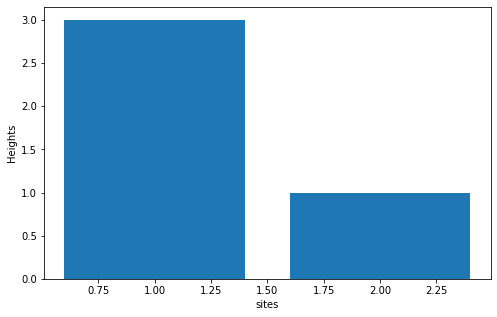

In [103]:
# L = 1
N_S = 3**L

def N_R(L):
    phi = (1+np.sqrt(5))/2
    N_R = 1/np.sqrt(5)* (phi *(1+phi)**L + 1/(phi * (1+phi)**L))
    return N_R

N_R(2)
a,b,c,configurations = Oslo(2,p = 1/2,plot= True,N_recurrents = 10)

abc = [list(x) for x in set(tuple(x) for x in configurations)]

# [plot_bar(abc[x]) for x in range(len(abc))]

# Questions 
1. What exactly is a recurrent configuration?
    * Only after it reaches a steady state right?
    * Notes say not all stable states are recurrent, are everything after steady state recurrent?
        * Recurrent states before steady state?
2. How can you even optimise further?
3. A method to calculate i=1 for different values of p?


#### Efficiency Test

In [21]:
import timeit

mysetup = """
import numpy as np
import random
L =100
prob = [0.5,0.5]
z_ths = [1,2]
"""

mycode = "np.random.choice(z_ths,p=prob)"
print(timeit.timeit(setup = mysetup,stmt = mycode,number = 1000))

mycode = "random.choice(z_ths)"
print(timeit.timeit(setup = mysetup,stmt = mycode,number = 1000))

0.03508666500010804
0.0009010969999962981


In [37]:
import pandas as pd

df = pd.DataFrame({"A":[1,2,3],"B":[2,3,4]})
df["C"] = df.B-df.A
df.
print(df)

   A  B  C
0  1  2  1
1  2  3  1
2  3  4  1


In [164]:
import timeit

mysetup = """
import numpy as np
import random
z = np.linspace(0,100,100)
z_th = np.linspace(0,100,100)
z_diff = z-z_th
"""

mycode = "if any(x > y for x,y in zip(z,z_th)) == True:print('hi')"
print(timeit.timeit(setup = mysetup,stmt = mycode,number = 1000))

mycode = "[x for x in z_diff if x > 0]"
print(timeit.timeit(setup = mysetup,stmt = mycode,number = 1000))

0.041183499999533524
0.0407183420002184


In [159]:
z = np.array([2,3,4])
z[1] = 2
print(z)

[2 2 4]


In [177]:
relaxed = False
z = np.array([1,8,1])
z_th = np.array([5,5,6])

while relaxed == False:

    if any(x > y for x,y in zip(z,z_th)) == True:
        relaxed = False
        print(False)
        print(z)
        z-=1
    else:
        relaxed = True
print(z)

False
[1 8 1]
False
[0 7 0]
False
[-1  6 -1]
[-2  5 -2]


In [145]:
z = [2,0,0]
z_th = [1,1,1]
if z[0] > z_th[0] and sum(z[1:]) == 0:
    print(123)

123
